In [88]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


In [89]:
# Импорт библиотек/фукнций из библиотек
# Уже импортированы numpy - алгебра и pandas - работа с csv файлами, табличками
import matplotlib.pyplot as plt #билиотека, строить графики
from sklearn.preprocessing import StandardScaler #Стандартизация характеристик
from sklearn.preprocessing import MinMaxScaler #Стандартизация характеристик
from sklearn.model_selection import KFold #Функция из библиотеки sklearn для разделения выборки для кросс-валидации
from sklearn.linear_model import SGDRegressor #Функция потерь для анализа одной выборки
from sklearn.metrics import mean_squared_error #MSE metrics для усреднения оценок кросс-валидации

In [90]:
# Настройка изображения табличек
pd.options.display.max_columns = 200 #pd - Библиотека pandas для табличек
pd.options.display.max_rows = 100 # ПОЧЕМУ-ТО ТАК НЕ ПОЛУЧАЕТСЯ ВЫВЕСТИ 100 СТРОК :С

In [91]:
# Чтение документов. Такой тип данных называется dataframe, читается с помощью библиотеки pandas
# Мы присваиваем переменной результат прочтения документа?
train=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv") 
test=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample_submission=pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [92]:
train.head(100) # чтобы вывести 100 строк, почему-то так работает. Можно просто написать train и будет работать. Почему не нужно писать print()?

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [93]:
test.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,763.0,763.0,GasA,Gd,Y,SBrkr,763,892,0,1655,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1993.0,Fin,2.0,440.0,TA,TA,Y,157,84,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1998,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,789.0,789.0,GasA,Gd,Y,SBrkr,789,676,0,1465,0.0,0.0,2,1,3,1,TA,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,393.0,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,7,5,1990,1990,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,637.0,Unf,0.0,663.0,1300.0,GasA,Gd,Y,SBrkr,1341,0,0,1341,1.0,0.0,1,1,2,1,Gd,5,Typ,1,Po,Attchd,1990.0,Unf,2.0,506.0,TA,TA,Y,192,0,0,0,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1970,1970,Gable,CompShg,

In [94]:
sample_submission.head(100)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
5,1466,177150.989247
6,1467,172070.659229
7,1468,175110.956520
8,1469,162011.698832
9,1470,160726.247831


In [95]:
#Cтандартизация данных (и тренировочных и тестовых) от -1 до 1 (среднее значение 0, дисперсия 1)
#mean = train.mean(axis=0)
#std = train.std(axis=0)
#Вычитаем среднее значение, делим на стандартное отклонение
#train -= mean
#train /= std
#Это не работает. Может из-за того, что в train есть столбцы с буквами и из-за этого нужно изменять по столбцу, а не всю таблицу.

In [96]:
features=["GarageArea", "MasVnrArea", "GrLivArea", "YearRemodAdd", "GarageYrBlt", "YrSold", "MoSold", "SalePrice"]
#Обязательно ли создавать лист с csv файлами? Нельзя их сразу вытаскивать из таблицы?

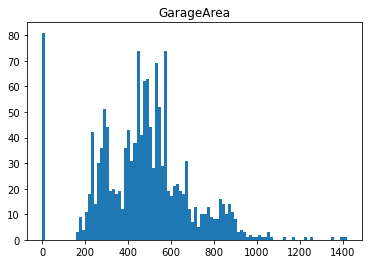

/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


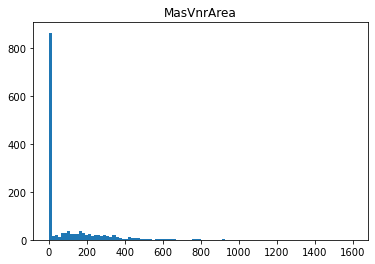

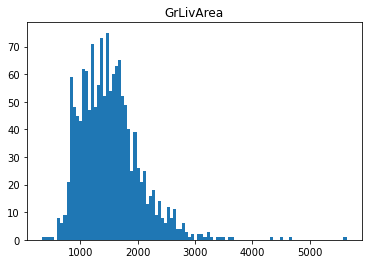

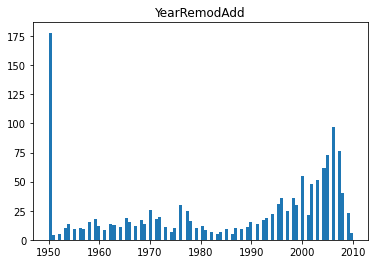

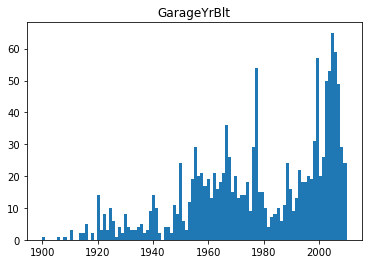

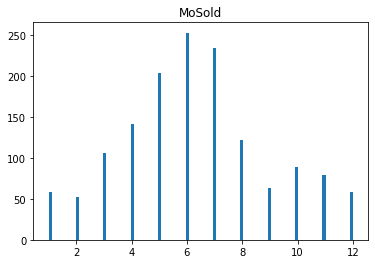

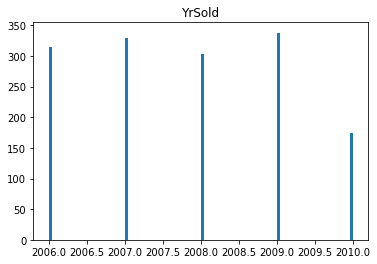

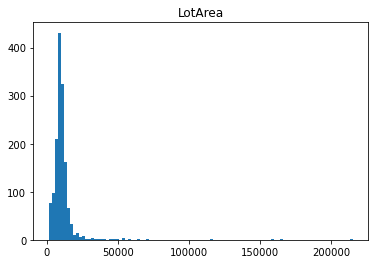

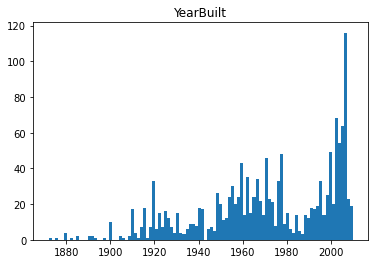

In [97]:
#Строим гистограммы для признаков, которые интересны, которые хотим использовать
plt.hist( train["GarageArea"], bins = 100)
plt.title ("GarageArea")
plt.show()
plt.hist( train["MasVnrArea"], bins = 100)
plt.title("MasVnrArea")
plt.show()
plt.hist( train["GrLivArea"], bins = 100)
plt.title ("GrLivArea")
plt.show()
plt.hist( train["YearRemodAdd"], bins = 100)
plt.title("YearRemodAdd")
plt.show()
plt.hist( train["GarageYrBlt"], bins = 100)
plt.title("GarageYrBlt")
plt.show()
plt.hist( train["MoSold"], bins = 100)
plt.title ("MoSold")
plt.show()
plt.hist( train["YrSold"], bins = 100)
plt.title("YrSold")
plt.show()
plt.hist( train["LotArea"], bins = 100)
plt.title("LotArea")
plt.show()
plt.hist( train["YearBuilt"], bins = 100)
plt.title("YearBuilt")
plt.show()
#Какое-то черное окно. Не понимаю, почему. Но вроде все остальное ок при этом.

In [98]:
#np.corrcoef("GarageArea","Sale Price")
#Почему не работает???

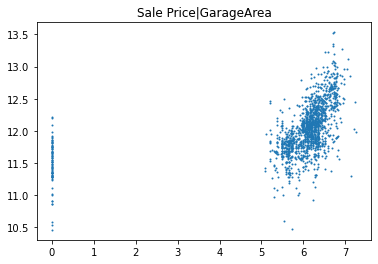

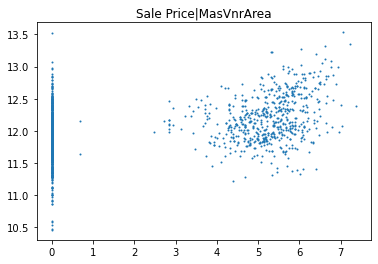

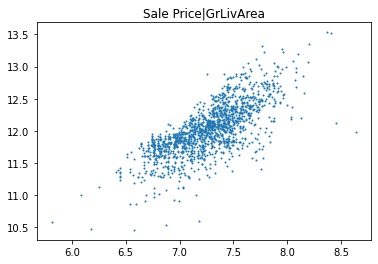

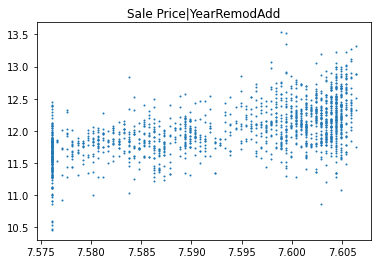

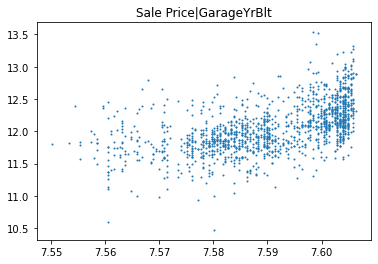

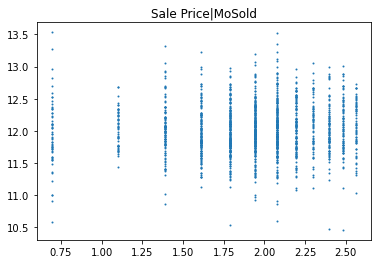

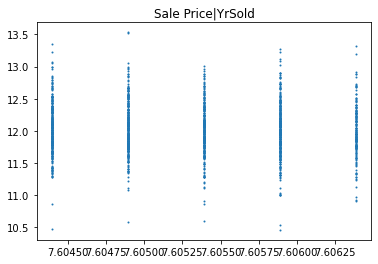

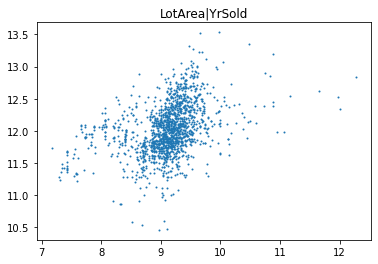

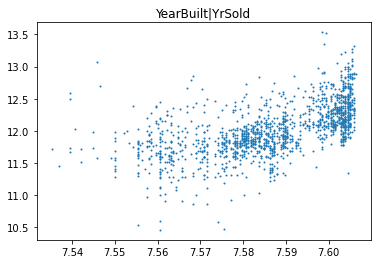

In [99]:
#Визуализируем корреляцию цены с интересующими характеристиками
plt.scatter( np.log1p(train ["GarageArea"]), np.log1p(train ['SalePrice']), s = 1 )
plt.title('Sale Price|GarageArea')
plt.show()
plt.scatter( np.log1p(train ["MasVnrArea"]), np.log1p(train ['SalePrice']), s = 1 )
plt.title('Sale Price|MasVnrArea')
plt.show()
plt.scatter( np.log1p(train ["GrLivArea"]), np.log1p(train ['SalePrice']), s = 1 )
plt.title('Sale Price|GrLivArea')
plt.show()
plt.scatter( np.log1p(train ["YearRemodAdd"]), np.log1p(train ['SalePrice']), s = 1 )
plt.title('Sale Price|YearRemodAdd')
plt.show()
plt.scatter( np.log1p(train ["GarageYrBlt"]), np.log1p(train ['SalePrice']), s = 1 )
plt.title('Sale Price|GarageYrBlt')
plt.show()
plt.scatter( np.log1p(train ["MoSold"]), np.log1p(train ['SalePrice']), s = 1 )
plt.title('Sale Price|MoSold')
plt.show()
plt.scatter( np.log1p(train ["YrSold"]), np.log1p(train ['SalePrice']), s = 1 )
plt.title('Sale Price|YrSold')
plt.show()
plt.scatter( np.log1p(train ["LotArea"]), np.log1p(train ['SalePrice']), s = 1 )
plt.title('LotArea|YrSold')
plt.show()
plt.scatter( np.log1p(train ["YearBuilt"]), np.log1p(train ['SalePrice']), s = 1 )
plt.title('YearBuilt|YrSold')
plt.show()

In [100]:
#Выбираем характеристики, коррелирующие со стоимостью домов. Есть признаки, хорошо коррелирующие, но не на всем промежутке. Что с ними можно сделать? Можно ли отбросить части значений, где они плохо предсказывают y? (если признак "площадь гаража" равен 0, например)
#Для хорошей линейной регрессии нужно нормальное распределение остатков, гомоскедатичность. Если мы предсказываем по нескольким независимым параметрам, то они должны плохо коррелировать между собой.
#Выбираю GarageArea, MasVnrArea, GrLivArea, YearRemodAdd, GarageYrBlt

In [101]:
train["SalePriceLog"] = np.log1p(train["SalePrice"])
#Стандартизуем данные как на занятии показали и в тренировочном и в тестовых наборах
#Цель - уменьшить диапазон чисел и привести распределение +- к нормальному
#Можно использовать Z-стандартизацию или зажимать значения в отрезке или логнормальное распределение использовать
#Как понять, что использовать?
#Я решила по гистограммам посмотреть и с сильно ассиметричными использовать StandardScaler, а с более менее норм MinMax

Lg_scaler =  StandardScaler() #что делаем этой строчкой?
test['GarageAreaLog'] = np.log(test['GarageArea'] + 1) #Сначала Логарифмируем, чтобы уменьшить значения. Но зачем прибавляем единицу???
train['GarageAreaLog'] = np.log(train['GarageArea'] + 1)#Создаем новый столбец в таблице, значения в столбце будут равняться np.log от столбца (LogArea +1)
train['GarageAreaNormalized'] = Lg_scaler.fit_transform(train[['GarageAreaLog']])#Почему в этой строчке fit_transform
test['GarageAreaNormalized'] = Lg_scaler.transform(test[['GarageAreaLog']])#а в этой просто transform?
#Почему при стандартизации нельзя сделать так же как и  при логарифмировании? Почему в три странные строчки это действие выполняется? 

test['MasVnrAreaLog'] = np.log(test['MasVnrArea'] + 1)
train['MasVnrAreaLog'] = np.log(train['MasVnrArea'] + 1)
train['MasVnrAreaNormalized'] = Lg_scaler.fit_transform(train[['GarageAreaLog']])
test['MasVnrAreaNormalized'] = Lg_scaler.transform(test[['GarageAreaLog']])

#MinMaxScaler`ом зажимаем все значения в интервале от 0 до 1 (точек в таком интервале больше, чем рациональных чисел - поэтому мы так можем сделать?)
MMScal =  MinMaxScaler() 

train['GrLivAreaNormalized'] = MMScal.fit_transform(train[['GrLivArea']])
test['GrLivAreaNormalized'] = MMScal.transform(test[['GrLivArea']])

train['YearRemodAddNormalized'] = MMScal.fit_transform(train[['YearRemodAdd']])
test['YearRemodAddNormalized'] = MMScal.transform(test[['YearRemodAdd']])

train['GarageYrBltNormalized'] = MMScal.fit_transform(train[['GarageYrBlt']])
test['GarageYrBltNormalized'] = MMScal.transform(test[['GarageYrBlt']])
#После этого можно еще раз визуализировать, чтобы понимать, что изменилось

In [102]:
model = SGDRegressor() #заключаем функцию в переменную? что это? Такая же строчка как при стандартизации

In [103]:
#Это примерный смысл того, что мы будем делать дальше. Но в начале мы проводим кросс-валидацию
#model.fit (train [features], train [["SalePriceLog"]] ) #здесь мы и используем весь наш лист features похоже. Видимо мы создавали его как раз для этого. Находим коээффициенты графика, где y - цена, которую мы предсказываем (второй параметр), а х - независимая переменная (первый параметр). Делаем это все на тренировочных данных.
#model.predict (train [features]) #Что делает эта команда?
#train_prediction = model.predict( X = train[['YearBuiltNormalized', 'LogLotAreaNormalized'] ] ) #Тут мы вводим обозначение функции, которая не знаю что делает
#model.intercept_ #коэффициент b0
#model.coef_ #коэффициент b1

Fold:  0
0 0.11996185368496635


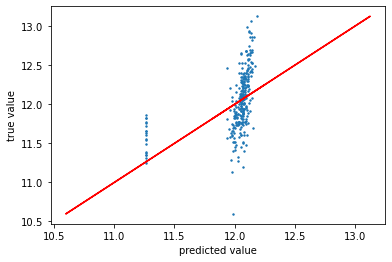

Fold:  1
1 0.13509120196463106


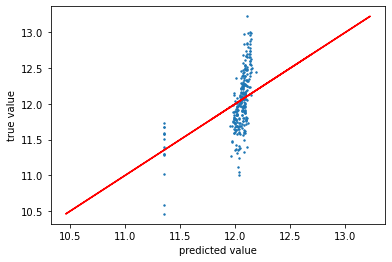

Fold:  2
2 0.13599151918452793


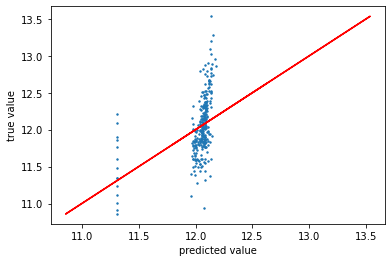

Fold:  3
3 0.1251002304406945


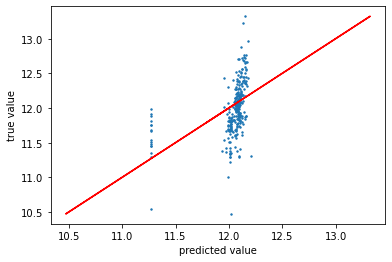

Fold:  4
4 0.1195553996171014


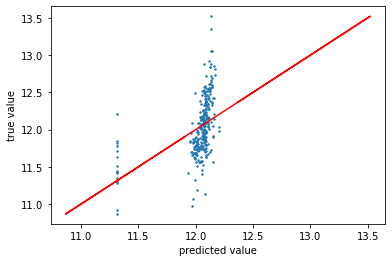

In [104]:
kf = KFold(n_splits=5) #обозначаем функцию, делящую данные на 5 частей
kf.get_n_splits(train) #делим данные train на 5 частей

mse_list = [] #обозначили пустой лист
rmse_list = []
for i, (train_index, test_index) in enumerate(kf.split(train)): #не очень поняла строчку
    print( "Fold: ", i)
    #далее мы похоже просто вводим переменные x_train y_train и в них находятся независимые переменные и предсказываемая, соответственно, из столбцов таблицы
    #Что значит train.loc?
    x_train, x_test = train.loc[train_index, ['GarageAreaNormalized']], train.loc[test_index, ['GarageAreaNormalized']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'],train.loc[test_index, 'SalePriceLog']
                                 
    #Вот на этом месте я могу менять характеристики по которым предсказываю интересующий меня показатель и комбинировать их.
    
    model.fit (x_train, y_train)
    x_test_predictions = model.predict (x_test)
    mse = mean_squared_error (y_true = y_test, y_pred = x_test_predictions)#Обозначаем параметры метрики y_true и y_pred
    print(i, mse)
    mse_list.append(mse)#для каждого кусочка данных рассчитывается mse и добавляется в лист
    rmse_list.append(mse)
    
    plt.scatter(x_test_predictions, y_test, s = 2)
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    plt.plot(y_test, y_test, c='r')
    plt.show()

In [105]:
mse_list #выводит значения ошибок, которые на предыдущем шаге туда собрались

[0.11996185368496635,
 0.13509120196463106,
 0.13599151918452793,
 0.1251002304406945,
 0.1195553996171014]

In [106]:
print (np.mean(mse_list), np.std(mse_list)) #Зачем стандартное отклонение?
print (np.mean(rmse_list), np.std(rmse_list))

0.12714004097838424 0.007138397745872511
0.12714004097838424 0.007138397745872511


In [107]:
model.fit(train.loc[:, [ 'GarageAreaNormalized']], train.loc[:,  'SalePriceLog']) #зачем двоеточия?

SGDRegressor()

In [108]:
test_predictions = model.predict(test.loc[:, ['GarageAreaNormalized']]) #предсказываем SalePrice по GarageAreaLog из тестовой выборки

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
sample_submission['SalePrice'] = np.exp(test_predictions)-1 #создаем столбец в dataframe sample_submission
sample_submission.to_csv('submission2.csv', index = None) #сохраняем как csv файл

In [ ]:
sample_submission #Выводит файл, в который мы должны зписать полученные результаты на тестовой выборке